<h1 style="text-align: center;"><strong>8. Ecuaciones Diferenciales</strong></h1>

<h2 style="text-align: center;"><span style="text-decoration: underline; color: #008080;"><strong>Algoritmos</strong></span></h2>

[<strong>M&eacute;todo 1: Euler </strong>](#m1)

[<strong>M&eacute;todo 2: Predictor-Correptor </strong>](#m2)

[<strong>M&eacute;todo 3: Runge-Kutta </strong>](#m3)

[<strong>M&eacute;todo 4: Adams-Bashforth</strong>](#m4)

<a id='m1'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 1:</strong> Euler</span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>


$$y(x_{n+1})= y(x_n) + hf(x_n,y(x_n)) $$


<h3><strong>b) Valores Iniciales</strong></h3>

* Valor $y_0$

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

**Ventajas**


* El método es explícito, solo utiliza el valor actual para obtener el valor siguiente.

**Desventajas**


* Es un método de estabilidad limitada.

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

<div class="alert alert-block alert-info">
    


<p><span style="text-decoration: underline;"><span style="text-decoration: underline;"><strong>Valores Iniciales:</strong></span></span> $y_0$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 1:</span> Obtener valor inicial $y_0$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 2:</span> Calcular el valor de h como la diferencia entre los términos de la sucesión. </p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 3:</span> Hacer el cálculo de $y_{n+1}$ con el valor previo. </p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 4:</span> Repetir el cálculo anterior para el resto de valores. </p>

</div>

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [13]:
function [xk,yk]= euler(f,x0,y0,n,v)

%Esta función aproxima la solución de una ECO de primer orden por Euler
%
%Sintaxis:  euler(f,x0,y0,n,v)
% 
%Parámetros Iniciales: 
%            f = una función f
%            x0,y0 = son los valores iniciales
%            n =  número positivo que representa la cant de puntos
%            v = vector de operacion
%            
%Parámetros de Salida:                           
%            xk = valores de x
%            yk = valores de y            
    xk = zeros(n,1);
    yk = zeros(n,1);
    
    xk(1) = x0;
    yk(1) = y0;
    
    h= (v(2)-v(1))/(n-1);
    
    for i=2:n
       yk(i) = yk(i-1)+ h*feval(f,xk(i-1),yk(i-1));
       xk(i) = h+xk(i-1);
       i=i+1;
    endfor
    plot(xk,yk)
end


<h3><strong>f) C&oacute;digo Python</strong></h3>

In [24]:

import numpy as np
import matplotlib.pyplot as plt


def euler(f,x0,y0,n,intervalo):
#Esta función aproxima la solución de una ECO de primer orden por Euler
#
#Sintaxis:  Euler(f,x0,y0,n,v)
# 
#Parámetros Iniciales: 
#            f = una función f
#            x0,y0 = son los valores iniciales
#            n =  número positivo que representa la cant de puntos
#            intervalo = vector de operacion
#            
#Parámetros de Salida:                           
#            x = valores de x
#            y = valores de y  
    x=np.zeros(n)
    x=np.zeros(n)
    y=np.zeros(n)
    x[0]=x0
    y[0]=y0
    h=(intervalo[1]-intervalo[0])/(n-1)
    
    for i in range(1,n):
        
        y[i] = y[i-1]+f(x[i-1],y[i-1])*h
        x[i] = x[i-1]+h
        
    plt.scatter(x,y)
    return x,y

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

<div class="alert alert-block alert-info">
    
Aproximar la solucion de la ecuacion diferencial con $x\in [0,2]$, y $y(0)=0.5$: 
$$y' = y-x^2+1$$

Con 11 puntos
</div>

xk =

   0.00000
   0.20000
   0.40000
   0.60000
   0.80000
   1.00000
   1.20000
   1.40000
   1.60000
   1.80000
   2.00000

yk =

   0.50000
   0.80000
   1.15200
   1.55040
   1.98848
   2.45818
   2.94981
   3.45177
   3.95013
   4.42815
   4.86578



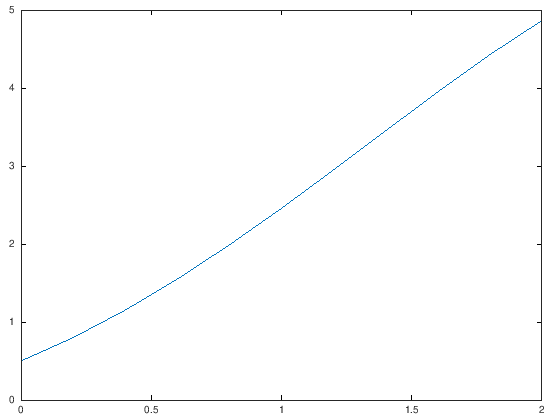

In [14]:
function u = F(x,y)
    u=y-x^2+1;
end

[xk,yk]= euler('F',0,0.5,11,[0 2])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([0.5       , 0.8       , 1.152     , 1.5504    , 1.98848   ,
        2.458176  , 2.9498112 , 3.45177344, 3.95012813, 4.42815375,
        4.8657845 ]))

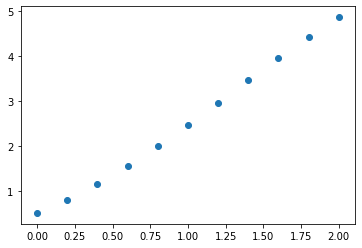

In [25]:
def F(x,y):
    return y-x**2+1

euler(F,0,0.5,11,[0,2])

<a id='m2'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 2:</strong> Predictor-Corrector </span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

$$ \tilde{y}_{n+1} = y_n + hf(x_n , y_n) $$
Con corrector
$$y_{n+1}= y_n + h \frac{f(x_n,y_n)+f(x_{n+1},\tilde{y}_{n+1})}{2}$$

<h3><strong>b) Valores Iniciales</strong></h3>

* Valores $x_0$ y $y_0$

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

**Ventajas**

* Extrapola el valor de la siguiente solución.
* Se auto-corrige usando la derivada del siguiente nivel.

**Desventajas**

* Se requiere el almacenar el valor del nivel anterior para la corrección.

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

<div class="alert alert-block alert-info">
    
    
<p><span style="text-decoration: underline;"><span style="text-decoration: underline;"><strong>Valores Iniciales:</strong></span></span> $x_0$ y $y_0$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 1:</span> Obtener los valores de $x_0$ y $y_0$.</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 2:</span> Calcular el valor predictor mediante el método de Euler.</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 3: </span> Realizar el cálculo del valor corrector con la fórmula específica del método.</p>


</div>

<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

In [16]:


function [xk,yk]= pred_corrector(f,x0,y0,n,v)

%Esta función aproxima la solución de una ECO de primer orden por Euler
%
%Sintaxis:  pred_corrector(f,x0,y0,n,v)
% 
%Parámetros Iniciales: 
%            f = una función f
%            x0,y0 = son los valores iniciales
%            n =  número positivo que representa la cant de puntos
%            v = vector de operacion
%            
%Parámetros de Salida:                           
%            xk = valores de x
%            yk = valores de y            
    xk = zeros(n,1);
    yk = zeros(n,1);
    
    xk(1) = x0;
    yk(1) = y0;
    
    h= (v(2)-v(1))/(n-1);
    
    for i=2:n
       xk(i) = h+xk(i-1);
       y2 = yk(i-1)+ h*feval(f,xk(i-1),yk(i-1));
       yk(i) = yk(i-1)+ h/2*(feval(f,xk(i-1),yk(i-1))+feval(f,xk(i),y2));
       i=i+1;
    endfor
    plot(xk,yk)
end

<h3><strong>f) C&oacute;digo Python</strong></h3>

In [28]:
import numpy as np
import matplotlib.pyplot as plt


def pred_corrector(f,x0,y0,n,intervalo):
#Esta función aproxima la solución de una ECO de primer orden por Euler
#
#Sintaxis:  pred_corrector(f,x0,y0,n,v)
# 
#Parámetros Iniciales: 
#            f = una función f
#            x0,y0 = son los valores iniciales
#            n =  número positivo que representa la cant de puntos
#            intervalo = vector de operacion
#            
#Parámetros de Salida:                           
#            x = valores de x
#            y = valores de y  
    x=np.zeros(n)
    y=np.zeros(n)
    x[0]=x0
    y[0]=y0
    h=(intervalo[1]-intervalo[0])/(n-1)
    
    for i in range(1,n):
        x[i] = x[i-1]+h
        y2 = y[i-1]+f(x[i-1],y[i-1])*h
        y[i] =y[i-1]+ h/2*(f(x[i-1],y[i-1])+f(x[i],y2))
        
    plt.scatter(x,y)
    return x,y

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

<div class="alert alert-block alert-info">
    
Aproximar la solucion de la ecuacion diferencial con $x\in [0,2]$, y $y(0)=0.5$: 
$$y' = y-x^2+1$$

Con 11 puntos
</div>

xk =

   0.00000
   0.20000
   0.40000
   0.60000
   0.80000
   1.00000
   1.20000
   1.40000
   1.60000
   1.80000
   2.00000

yk =

   0.50000
   0.82600
   1.20692
   1.63724
   2.11024
   2.61769
   3.14958
   3.69369
   4.23510
   4.75562
   5.23305



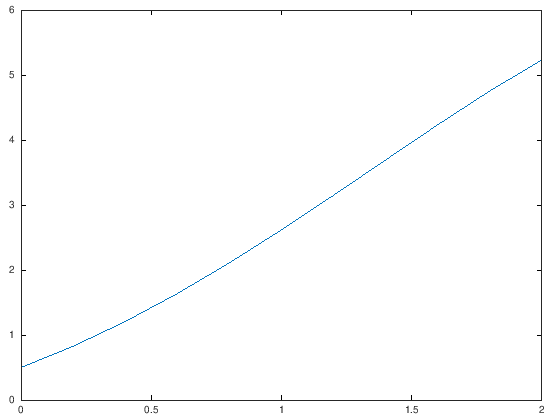

In [17]:
function u = F(x,y)
    u=y-x^2+1;
end

[xk,yk]= pred_corrector('F',0,0.5,11,[0 2])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 array([0.5       , 0.826     , 1.20692   , 1.6372424 , 2.11023573,
        2.61768759, 3.14957886, 3.69368621, 4.23509717, 4.75561855,
        5.23305463]))

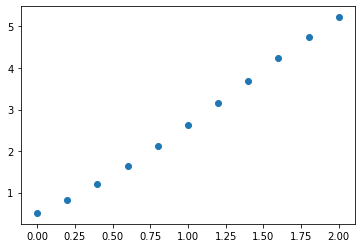

In [29]:
def F(x,y):
    return y-x**2+1

pred_corrector(F,0,0.5,11,[0,2])

<a id='m3'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 3:</strong>Runge-Kutta </span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

* Para orden 2:
$$y_{n+1} = y_n + hk_2$$ 

$$k_2 = f \left(x_n + \frac{h}{2}, y_n + h \frac{k_1}{2}\right) , k_1 = f(x_n,y_n)$$

* Para orden 3:

$$y_{n+1} = y_n + \frac{h}{6}(k_1+4k_2+k_3)$$

$$k_3 = f(x_n+h ,y_n + h (2k_2-k_1))$$

$$k_2 = f \left(x_n + \frac{h}{2}, y_n + h \frac{k_1}{2}\right) , k_1 = f(x_n,y_n)$$

<h3><strong>b) Valores Iniciales</strong></h3>

* Valores $x_0$ y $y_0$

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

**Ventajas**


* Es una modificación del método de Euler.

**Desventajas**


* El método posee resoluciones distintas para cada nivel. Esto implica mayor complejidad.

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

<div class="alert alert-block alert-info">
    


<p><span style="text-decoration: underline;"><span style="text-decoration: underline;"><strong>Valores Iniciales:</strong></span></span> $x_0$ y $y_0$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 1:</span> Obtener los valores $x_0$ y $y_0$ como valores iniciales</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 2:</span> Calcular $h$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 3:</span> Obtener los siguientes valores de distintos niveles con la fórmula propia del método.</p>


</div>


<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

<h3><strong>f) C&oacute;digo Python</strong></h3>

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

<div class="alert alert-block alert-info">
    
Aproximar la solucion de la ecuacion diferencial con $x\in [0,1]$, y $y(0)=1$: 
$$y' = -xy+\frac{4x}{y}$$

Con 11 puntos
</div>

<a id='m4'></a>
<h2><span style="color: #993300;"><span style="text-decoration: underline;"><strong>M&eacute;todo 4:</strong>Adams-Bashforth</span></span></h2>

<h3><strong>a) Formulaci&oacute;n Matem&aacute;tica</strong></h3>

* Metodo de dos pasos:

$$y_{k+1} = y_k + \frac{h}{2} [3f(x_k,y_k)-f(x_{k-1},y_{k-1})\,, \,\,\,\,k=1,2,3,4,...,n$$

* Metodo de tres pasos:

$$y_{k+1} = y_k + \frac{h}{12} [23f(x_k,y_k)-16f(x_{k-1},y_{k-1})+5f(x_{k-2},y_{k-2})\,, \,\,\,\,k=2,3,4,...,n$$

* Metodo de cuatro pasos:

$$y_{k+1} = y_k + \frac{h}{24} [55f(x_k,y_k)-59f(x_{k-1},y_{k-1})+37f(x_{k-2},y_{k-2})-9f(x_{k-3},y_{k-3})\,, \,\,\,\,k=3,4,...,n$$

<h3><strong>b) Valores Iniciales</strong></h3>

* Valores $y_0$ y $y_1$

<h3><strong>c) Ventajas y Desvantajas</strong></h3>

**Ventajas**


* Al ser un método explícito, posee alto nivel de consistencia.

**Desventajas**


* Al aumentar un nuevo paso, la complejidad del cálculo aumenta considerablemente.

<h3><strong>d) Pasos del m&eacute;todo (Pseudoc&oacute;digo)</strong></h3>

<div class="alert alert-block alert-info">
    


<p><span style="text-decoration: underline;"><span style="text-decoration: underline;"><strong>Valores Iniciales:</strong></span></span> $y_0$ y $y_1$</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 1:</span> Obtener los valores y0 y y1 como valores iniciales..</p>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;<span style="text-decoration: underline;">Paso 2:</span> Calcular los valores asociados al tipo de pasos utilizando la fórmula indicada para cada nivel.</p>


</div>


<h3><strong>e) C&oacute;digo en GNU Octave</strong></h3>

<h3><strong>f) C&oacute;digo Python</strong></h3>

<h3><strong>g) Ejemplo Num&eacute;rico</strong></h3>

<div class="alert alert-block alert-info">
    
Aproximar la solucion de la ecuacion diferencial con $x\in [2,4]$, y $y(2)=1$: 
$$y' = 1+(x+y)^2$$

Con 11 puntos, utilice $y_1=1.191$
</div>